# Trabajo práctico número 1

## Hacer un programa que utilice un Algoritmo Genético Canónico para buscar un máximo de la función:

#### f(x) = (x/coef)2 en el dominio [0 , 2^(30 - 1)]
donde coef = 2^(30-1)
teniendo en cuenta los siguientes datos:

1– Probabilidad de Crossover = 0,75

2– Probabilidad de Mutación = 0,05

3– Población Inicial: 10 individuos

4– Ciclos del programa: 200

5– Método de Selección: Ruleta

6– Método de Crossover: 1 Punto

7– Método de Mutación: invertida

#### El espacio solución estara formado por cromosomas de longitud 30
 y cada gen sera un dígito
binario 0 o 1

### Constantes

In [163]:
PROB_CROSSOVER = 0.75
PROB_MUTACION = 0.05
CICLOS = 200
CANTIDAD_POBLACION = 10
COEF = 1073741823 # 2^29
CANTIDAD_GENES = 30
ITERACIONES_IMPRIMIBLES = [20, 100, 200]

### Librerías necesarias

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generando población inicial aleatoria

In [165]:
def poblacionInicial():
    rng = np.random.default_rng() # Random Number Generator
    # El 12345 es la semilla, poner sin semilla para q en cada ejecución genere nuevos aleatorios.
    poblacion_decimal = rng.integers(low=0, high=COEF, size=CANTIDAD_POBLACION)
    return poblacion_decimal
poblacion_decimal = poblacionInicial()
poblacion_decimal

array([ 670724776,  513795680,  228733917,  564040683,  536245493,
        998991123, 1044716144,  810228148,  190831830,  505140716],
      dtype=int64)

#### Convirtiendo la población inicial a binario

In [166]:
def convertirPoblacion(pob_ini, bin=True): # Pasar False para convertir a decimal
    pob_fin = []
    for numero in pob_ini:
        if bin:
            # convirtiendo cada número decimal en binario de 8 dígitos.
            pob_fin.append(format(numero,'030b'))
        else:
            pob_fin.append(int(str(numero), 2))
    return pob_fin

poblacion_binarios= convertirPoblacion(poblacion_decimal)
poblacion_binarios

['100111111110100111001010101000',
 '011110100111111110011001100000',
 '001101101000100011001111011101',
 '100001100111101001001111101011',
 '011111111101100111010011110101',
 '111011100010110110010100010011',
 '111110010001010001101001110000',
 '110000010010110001100110110100',
 '001011010111111101110011010110',
 '011110000110111101010111101100']

### Función objetivo

In [167]:
#(x/coef)2
# Pasar población decimal
def funcionObjetivo(pob):
    colObjetivo=[]
    # El nombre cromosoma es por semántica, en realidad va a trabajar con cada valor decimal
    for cromosoma in pob:
        colObjetivo.append((int(cromosoma)/int(COEF))**2) #TODO preguntar por esto. lo saque así de la consigna 
    #convertir lista en numpy arrray (para operaciones matemáticas)
    npColObjetivo = np.array(colObjetivo)
    return npColObjetivo

### Generando un marco de datos

In [168]:
def generarDataFrame(pob_dec, pob_bin): #TODO refactor: se puede hacer con un solo parametro.
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 'FuncionObjetivo':funcionObjetivo(pob_dec)}
    dataFrame = pd.DataFrame(data)
    dataFrame['Fitness'] = dataFrame['FuncionObjetivo'] / dataFrame['FuncionObjetivo'].sum()
    return dataFrame

marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
display(marcoDeDatos)

,Decimales,Binarios,FuncionObjetivo,Fitness
0,670724776,100111111110100111001010101000,0.390202,0.102027
1,513795680,011110100111111110011001100000,0.228971,0.059870
2,228733917,001101101000100011001111011101,0.045380,0.011866
3,564040683,100001100111101001001111101011,0.275944,0.072152
4,536245493,011111111101100111010011110101,0.249418,0.065216
5,998991123,111011100010110110010100010011,0.865612,0.226334
6,1044716144,111110010001010001101001110000,0.946666,0.247527
7,810228148,110000010010110001100110110100,0.569397,0.148881
8,190831830,001011010111111101110011010110,0.031587,0.008259
9,505140716,011110000110111101010111101100,0.221322,0.057870


#### Estadisticas

In [169]:
def generarEstadisticas(dataFrame):
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ], 'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ], 'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    return dataFrame_stats, stats

marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)

display(marcoDeDatos_stats)

,Suma,Promedio,Máximo,Mínimo
Función objetivo,3.824499,0.38245,0.946666,0.031587
Fitness,1.000000,0.10000,0.247527,0.008259


### Generando una nueva población a partir de otra

Selección de padres para la próxima generación

#### Elitismo

In [170]:
def elitismo(marcoDeDatos, cantidad):
    fitness = list(marcoDeDatos['Fitness']).copy()
    no_elites = list(marcoDeDatos['Binarios']).copy()
    elites = []
    for i in range(0, cantidad):
        # busca cual es cromosoma con mayor fitness
        ganador = max(fitness)
        indiceGanador = fitness.index(ganador)
        cromosomaGanador = no_elites[indiceGanador]
        # agrega el cromosoma a la lista de elites 
        elites.append(cromosomaGanador)
    return elites

elit = elitismo(marcoDeDatos, 2)
print(elit)

['111110010001010001101001110000', '111110010001010001101001110000']


#### Método ruleta

In [171]:
def ruleta(dataFrame, cantPoblacion): #pasar marco de datos
    # TODO PREGUNTAR RULETA ALEATORIA O BASADA EN PROPORCIONES
    probabilidades = np.array(dataFrame['Fitness']) #Asigna probabilidad basada en el fitness
    cromosomas = np.array(dataFrame['Binarios'])
    np.random.seed() 
    salida = list(np.random.choice(cromosomas, size=int(cantPoblacion), p=probabilidades))
    return salida

cromosomasPadresRuleta = ruleta(marcoDeDatos, 10)
cromosomasPadresRuleta

['111011100010110110010100010011',
 '111011100010110110010100010011',
 '110000010010110001100110110100',
 '100111111110100111001010101000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '011110100111111110011001100000',
 '011111111101100111010011110101']

#### Método torneo

In [172]:
def torneo(dataFrame, cantPoblacion):
    salida = []
    fitness = np.array(dataFrame['Fitness'])
    cromosomas = np.array(dataFrame['Binarios'])
    for i in range(0, cantPoblacion):
        posiblesCantidades = [ x for x in range(1,cantPoblacion+1)]
        np.random.seed() 
        cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
        miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
        ganador = np.amax(miembrosTorneo)
        indiceGanador = np.where(fitness == ganador) # retorna ndarray
        cromosomaGanador = cromosomas[indiceGanador[0][0]]
        salida.append(cromosomaGanador)
    return salida

cromosomasPadresTorneo = torneo(marcoDeDatos, 10)
cromosomasPadresTorneo

['111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '110000010010110001100110110100',
 '111011100010110110010100010011',
 '111110010001010001101001110000',
 '111011100010110110010100010011',
 '111011100010110110010100010011',
 '111110010001010001101001110000',
 '100111111110100111001010101000']

Test de prueba (podemos borrar desp)

In [173]:
fitness = np.array(marcoDeDatos['Fitness'])
cromosomas = np.array(marcoDeDatos['Binarios'])
posiblesCantidades = [ x for x in range(1,11)]
cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
ganador = np.amax(miembrosTorneo)
indiceGanador = np.where(fitness == ganador)
print(miembrosTorneo)
print("Cantidad: "+str(cantidadMiembrosTorneo[0]))
print("Fitness ganador: "+str(ganador))
print("Indice: "+str(indiceGanador[0][0]))
print("Cromosoma: "+str(cromosomas[indiceGanador[0][0]]))

[0.05986964 0.14888139 0.07215171 0.008259   0.0578696  0.22633359
 0.01186552 0.06521584 0.24752688 0.10202684]
Cantidad: 10
Fitness ganador: 0.24752687667367765
Indice: 6
Cromosoma: 111110010001010001101001110000


#### Crossover

In [174]:
def crossover(padres, cant): #Pasar ndarray cromosomas padres
    hijos = []
    for i in range(0,cant,2):
        opciones=[True, False]
        np.random.seed() 
        prob_cross = np.array([PROB_CROSSOVER,(1-PROB_CROSSOVER)]) # Probabilidades de cada opción
        cross = np.random.choice(opciones, size=1, p=prob_cross)
        if cross[0]:
            posiciones = [x for x in range(0, CANTIDAD_GENES)]
            probCorte = [1/CANTIDAD_GENES for x in range(0, CANTIDAD_GENES)]
            corte = np.random.choice(posiciones, size=1, p=probCorte) # Devuelve ndarray de 1 elemento
            posicionCorte = corte[0] 
            primerTiraGenesPadre1 = padres[i][0:posicionCorte]
            segundaTiraGenesPadre1 = padres[i][posicionCorte:CANTIDAD_GENES]
            primerTiraGenesPadre2 = padres[i+1][0:posicionCorte]
            segundaTiraGenesPadre2 = padres[i+1][posicionCorte:CANTIDAD_GENES]
            hijos.append(primerTiraGenesPadre1 + segundaTiraGenesPadre2) # Hijo 1
            hijos.append(primerTiraGenesPadre2 + segundaTiraGenesPadre1) # Hijo 2
        else:
            hijos.append(padres[i])
            hijos.append(padres[i+1])
    return hijos

##### Crossover ruleta

In [175]:
cromosomasHijosRuleta = crossover(cromosomasPadresRuleta,10)
cromosomasHijosRuleta

['111011100010110110010100010011',
 '111011100010110110010100010011',
 '110000010010110001101010101000',
 '100111111110100111000110110100',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '011110100111111111010011110101',
 '011111111101100110011001100000']

##### Crossover torneo

In [176]:
cromosomasHijosTorneo = crossover(cromosomasPadresTorneo,10)
print(cromosomasHijosTorneo)

['111110010001010001101001110000', '111110010001010001101001110000', '111110010001010001100110110100', '110000010010110001101001110000', '111011100010110110010100010011', '111110010001010001101001110000', '111011100010110110010100010011', '111011100010110110010100010011', '111110010001010001101001110000', '100111111110100111001010101000']


#### Mutación

In [177]:
def mutacion(cromosomas, cant):
    hijos = []
    rng = np.random.default_rng() # Random Number Generator
    for i in range(0,cant):
        mutar = rng.random()
        
        if (PROB_MUTACION > mutar):
            posicion = rng.integers(low=0, high=29, size=1)
            #print("Posición: " + str(posicion))
            #print(cromosomas[i][posicion[0]])
            #print(cromosomas[i])
            if ( int(cromosomas[i][posicion[0]]) == 1 ):
                cromosoma = list(cromosomas[i]) # Convierte el lista al cromosoma seleccionado
                # Lo hice así porque python no permite asignar valores a una pisición de un array
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '0' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)  # volverlo a convertir en int (o podría ser a array)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
            else:
                cromosoma = list(cromosomas[i]) 
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '1' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
        else:
            hijos.append(cromosomas[i])
    return hijos 

hijosmutados = mutacion(cromosomasHijosRuleta, 10)

hijosmutados

['111011100010110110010100010011',
 '111011100010110110010100010011',
 '110001010010110001101010101000',
 '100111111110100111000110110100',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '111110010001010001101001110000',
 '011110100111111111010011110101',
 '011111111101100110011001100000']

### Gráficos

In [178]:
def hacerGrafico(estadisticas, iteracion):
    estadisticas["Iteración"]=[x for x in range(1,iteracion+1)]
    plt.figure(figsize=(20,20))
    plt.plot(estadisticas["Iteración"], estadisticas["Máximo"], 'b.-', label="Máximo")
    plt.plot(estadisticas["Iteración"], estadisticas["Mínimo"], 'r.-', label="Mínimo")
    plt.plot(estadisticas["Iteración"], estadisticas["Promedio"], 'g.-', label="Promedio")
    plt.legend()
    plt.title("Gráfica iteración: " + str(iteracion))
    plt.xticks(estadisticas["Iteración"][::1])
    plt.yticks(np.arange(0, 1.01, step=0.025))
    plt.xlabel("Iteraciones")
    plt.ylabel("F. Objetivo")
    plt.show()

### Main

CASO A: Método selección ruleta


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.567392,0.956739,0.956883,0.956644
Fitness,1.000000,0.100000,0.100015,0.099990


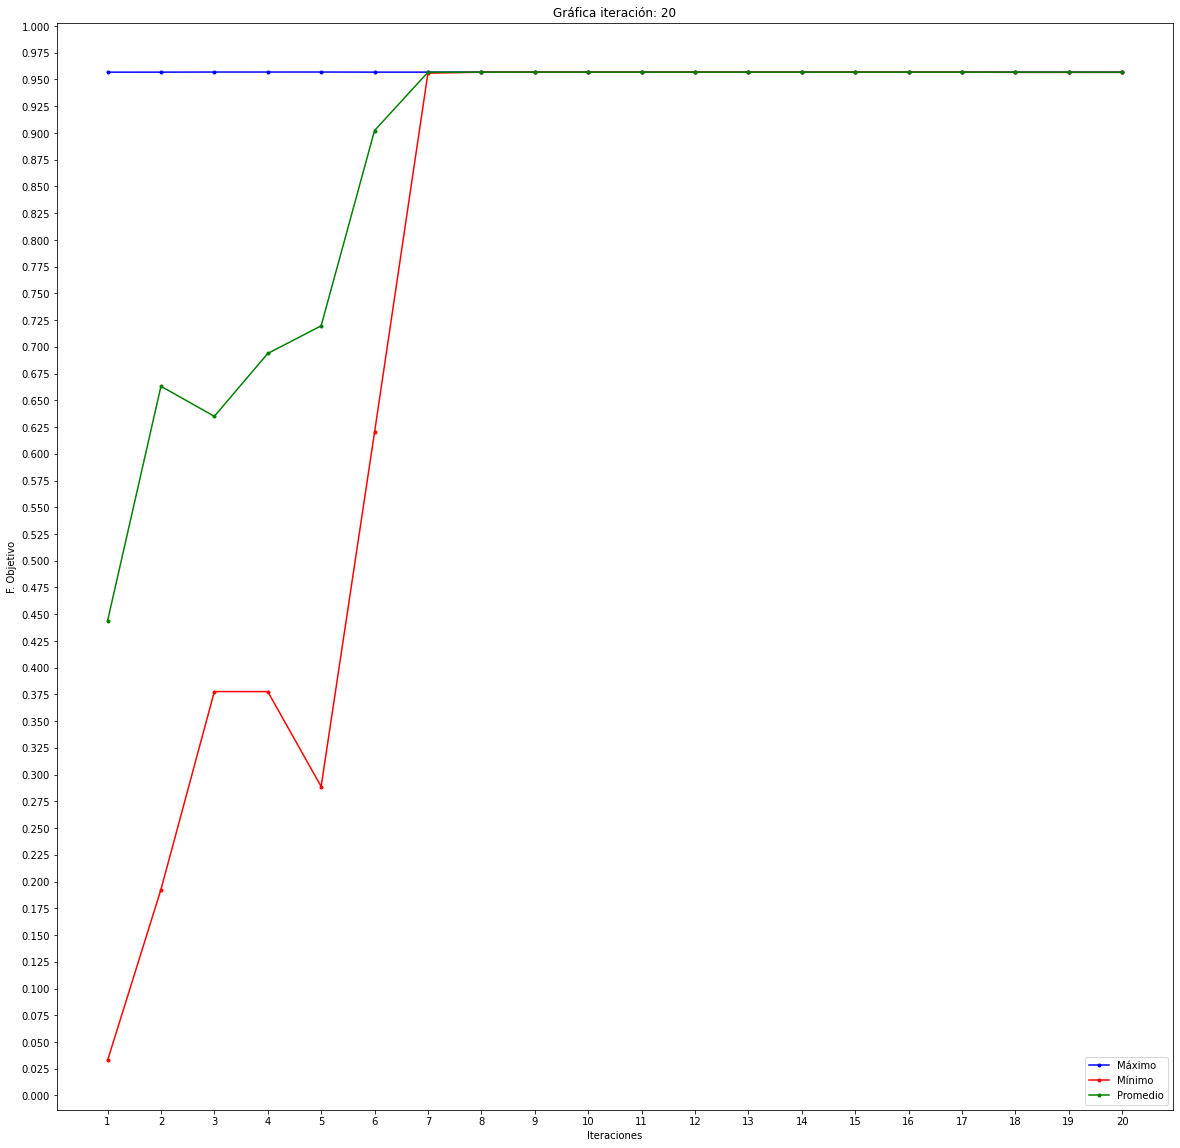

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.348721,0.934872,0.960438,0.727722
Fitness,1.000000,0.100000,0.102735,0.077842


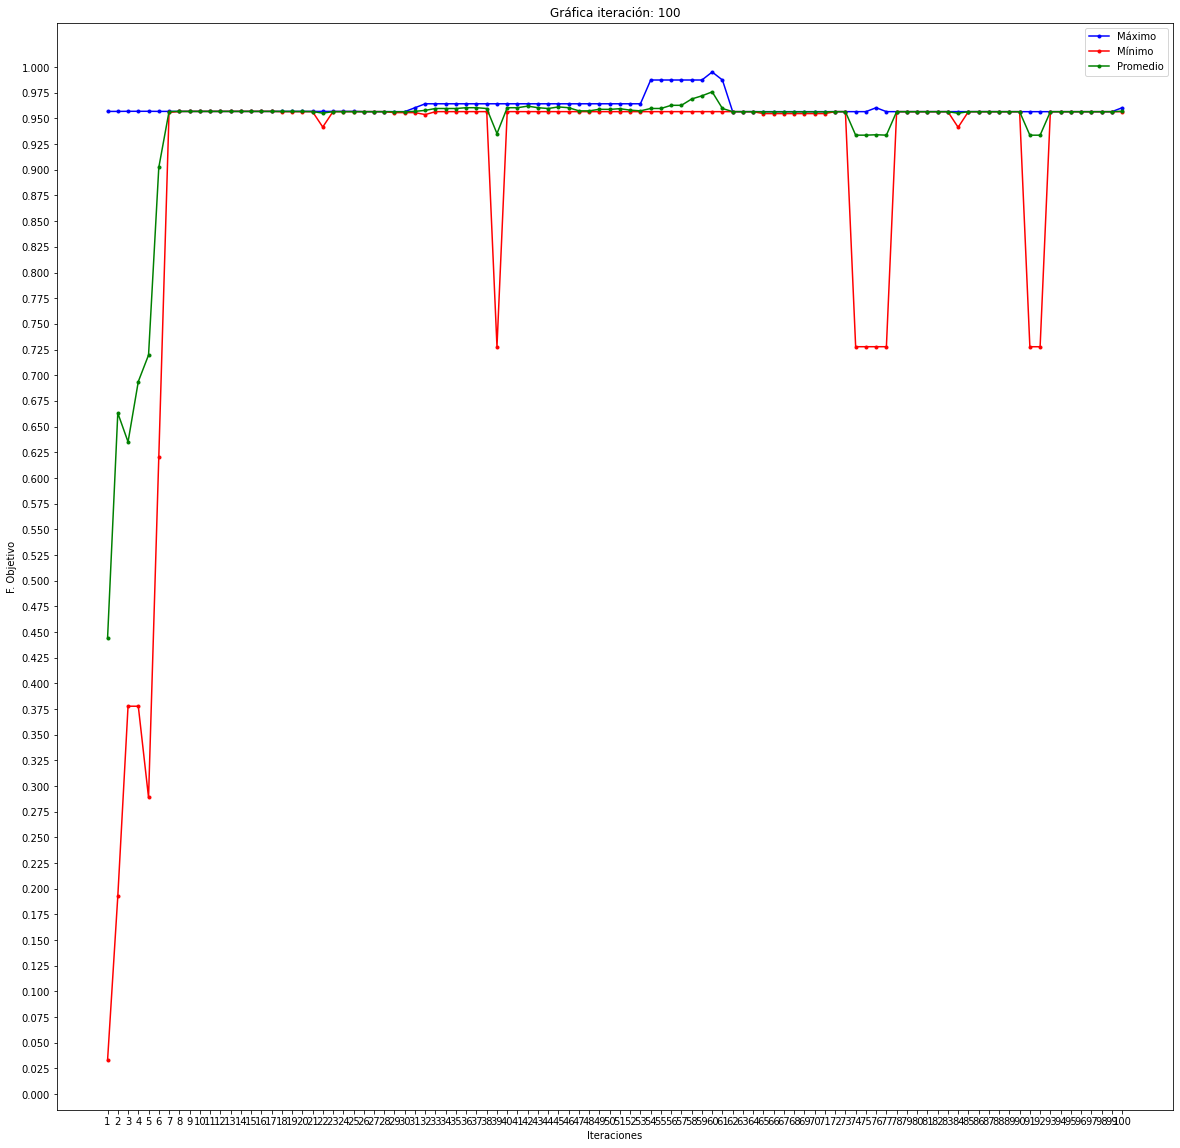

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.635776,0.963578,0.965110,0.957450
Fitness,1.000000,0.100000,0.100159,0.099364


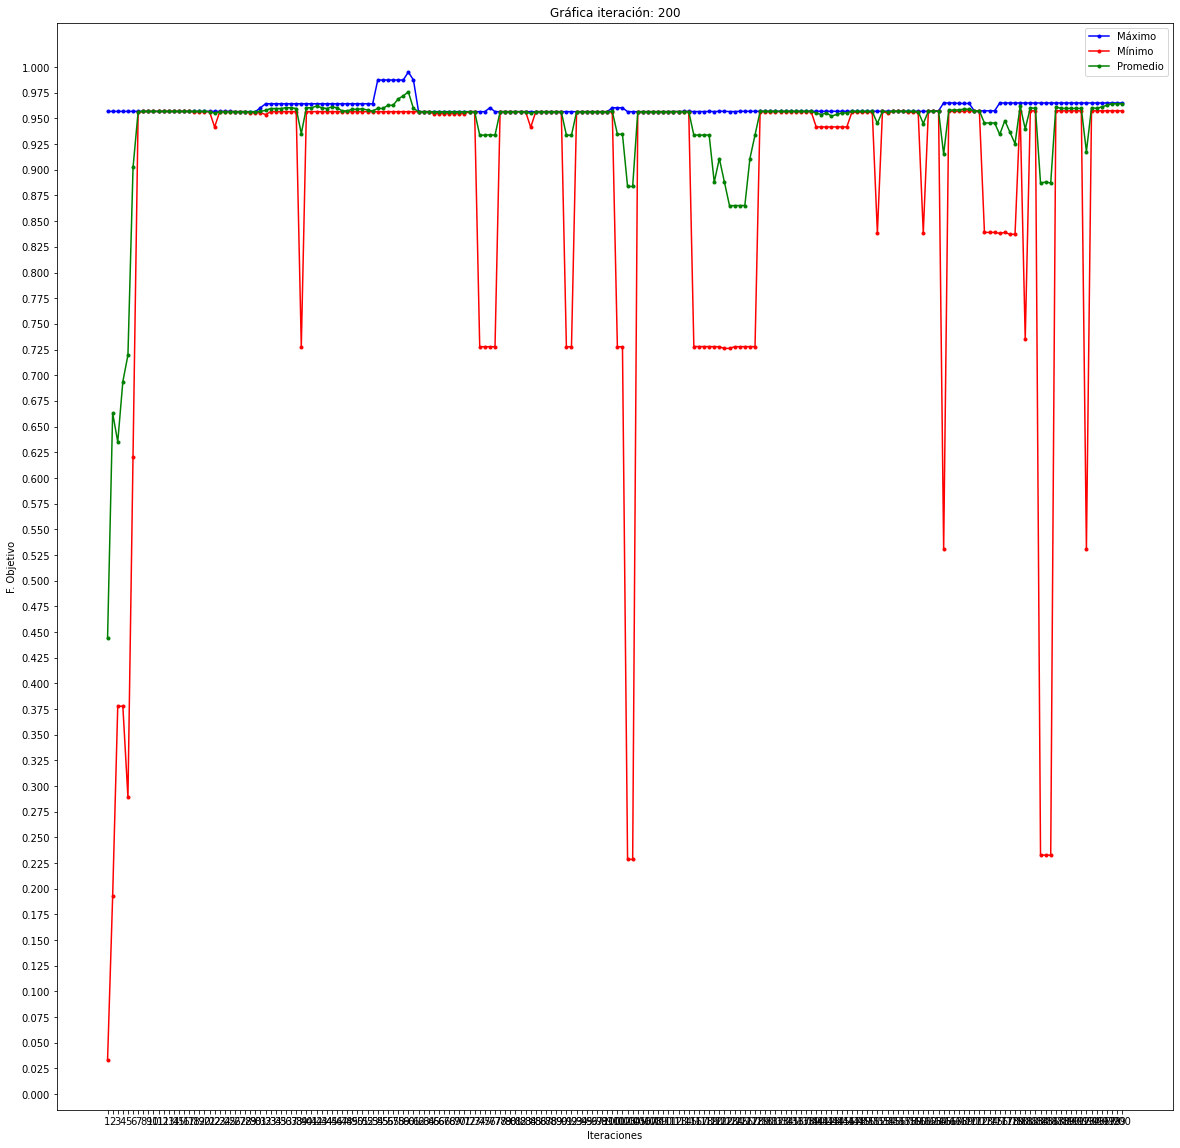

CASO B: Método selección torneo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.584202,0.958420,0.958420,0.958420
Fitness,1.000000,0.100000,0.100000,0.100000


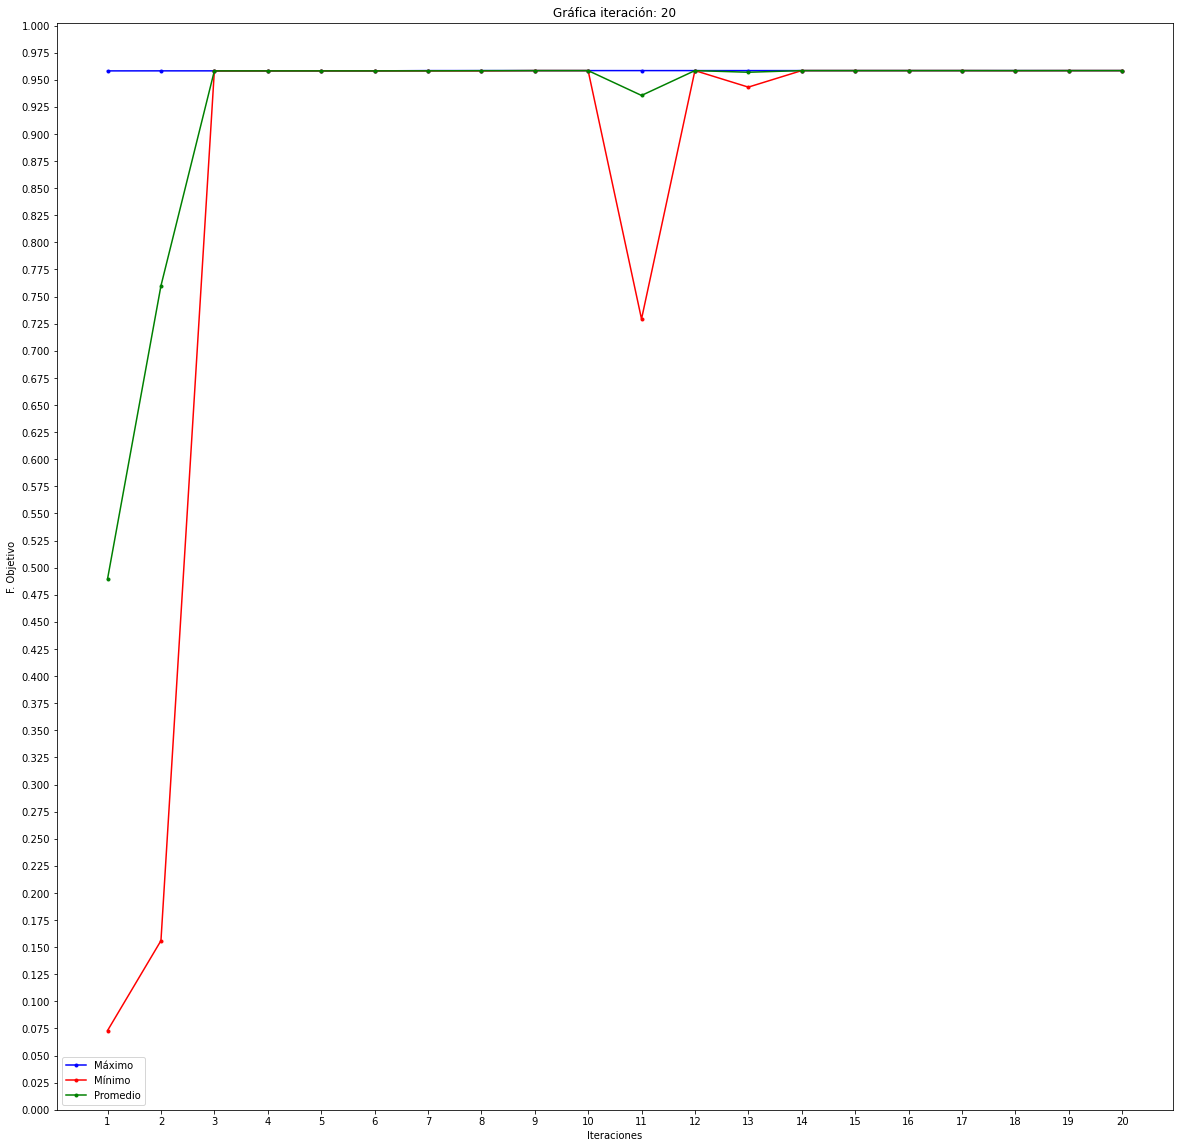

,Suma,Promedio,Máximo,Mínimo
Función objetivo,10.000000,1.000000,1.000000,1.000000
Fitness,1.000000,0.100000,0.100000,0.100000


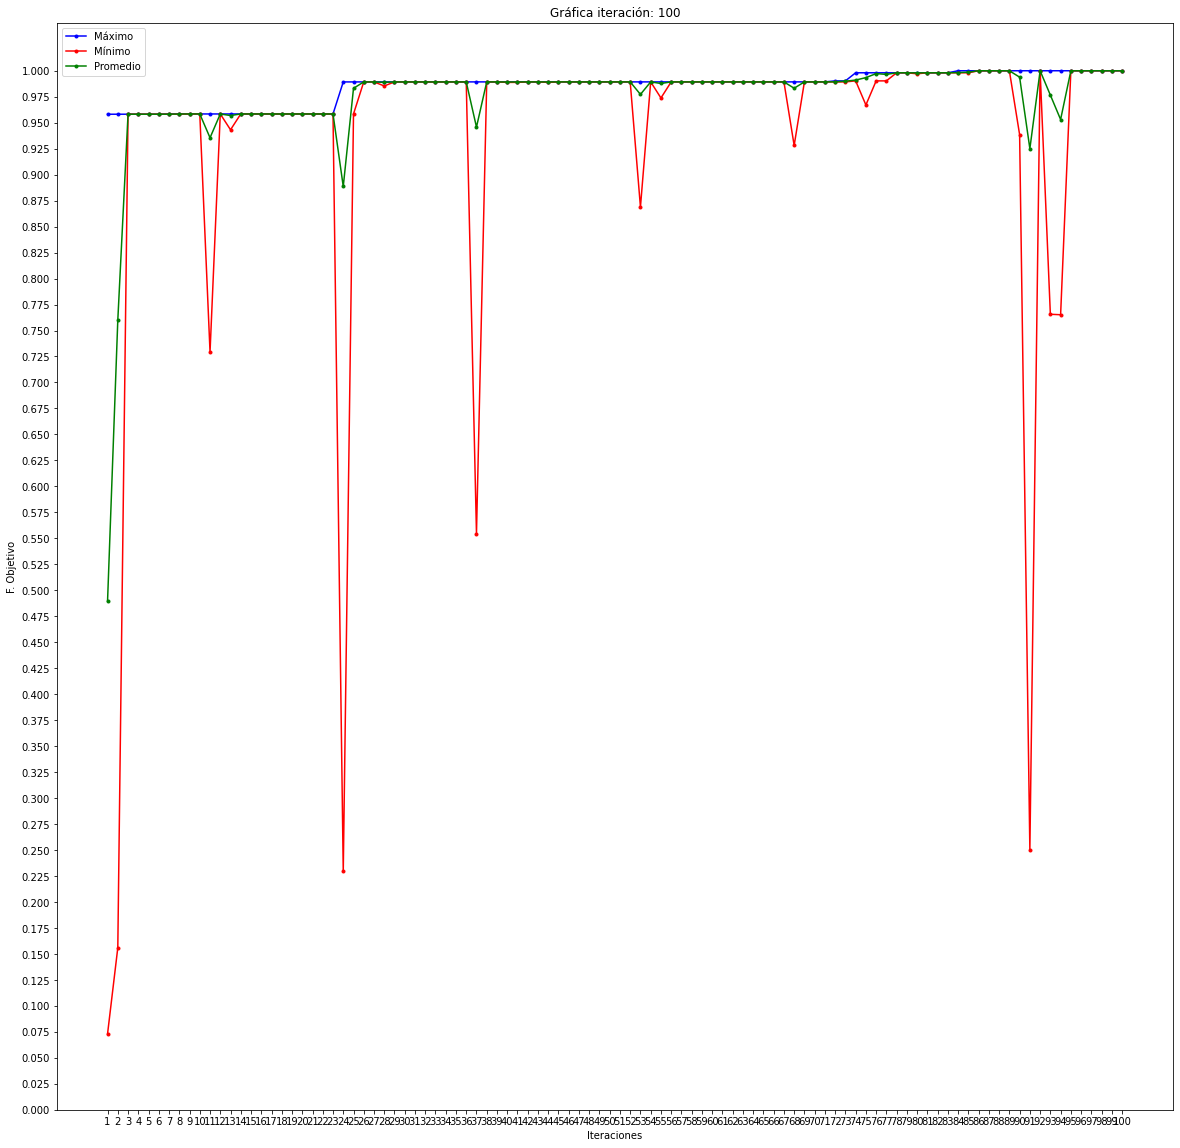

,Suma,Promedio,Máximo,Mínimo
Función objetivo,10.000000,1.000000,1.000000,1.000000
Fitness,1.000000,0.100000,0.100000,0.100000


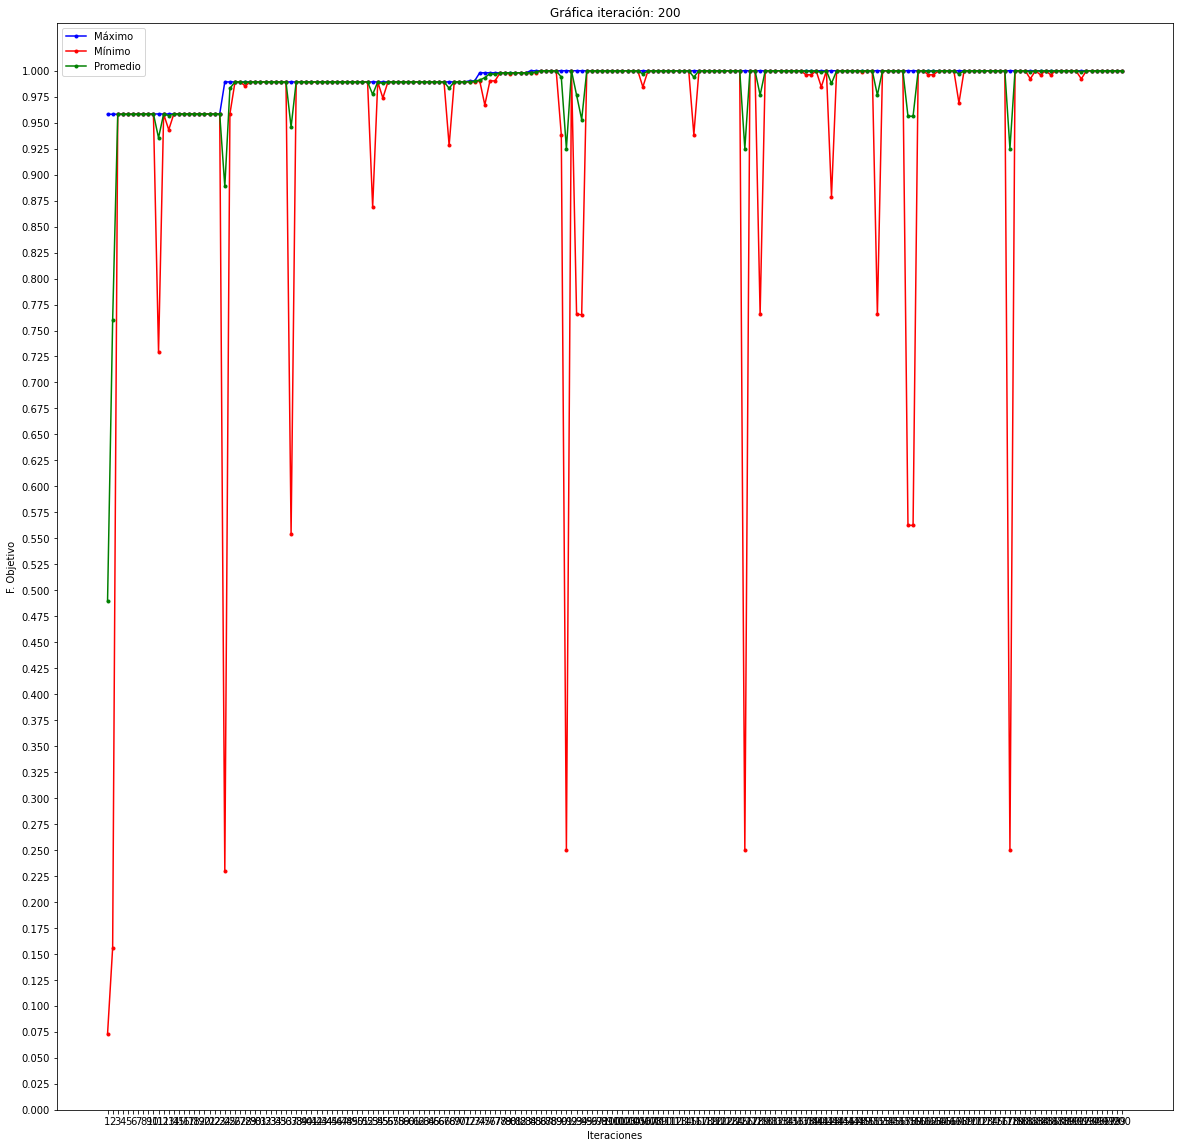

CASO C: Método selección Ruleta con elitismo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,6.278990,0.627899,0.628208,0.625116
Fitness,1.000000,0.100000,0.100049,0.099557


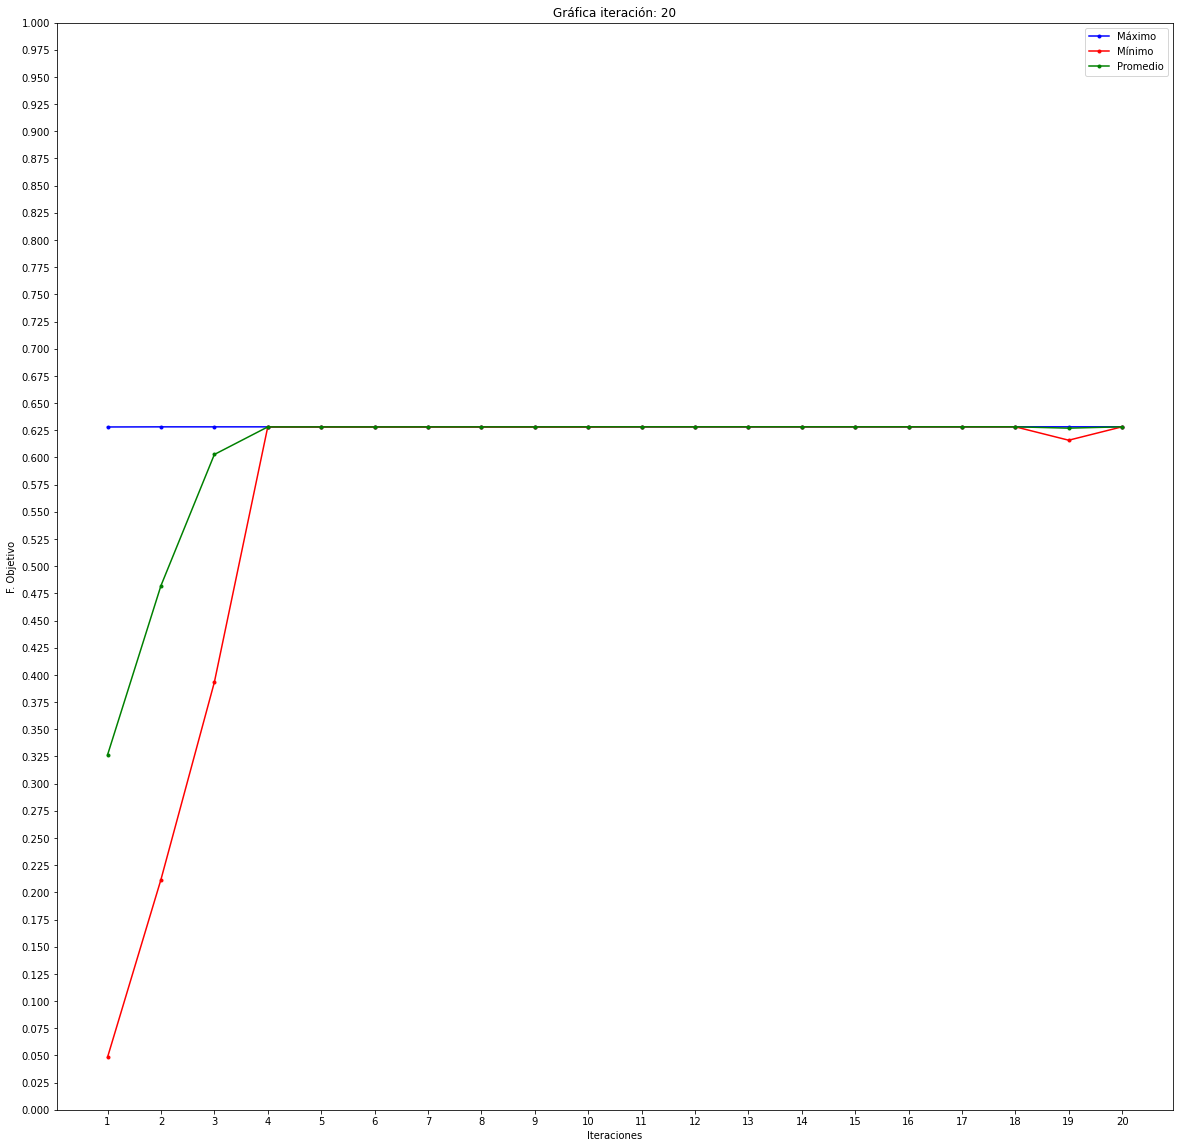

,Suma,Promedio,Máximo,Mínimo
Función objetivo,7.383091,0.738309,0.738519,0.738099
Fitness,1.000000,0.100000,0.100028,0.099972


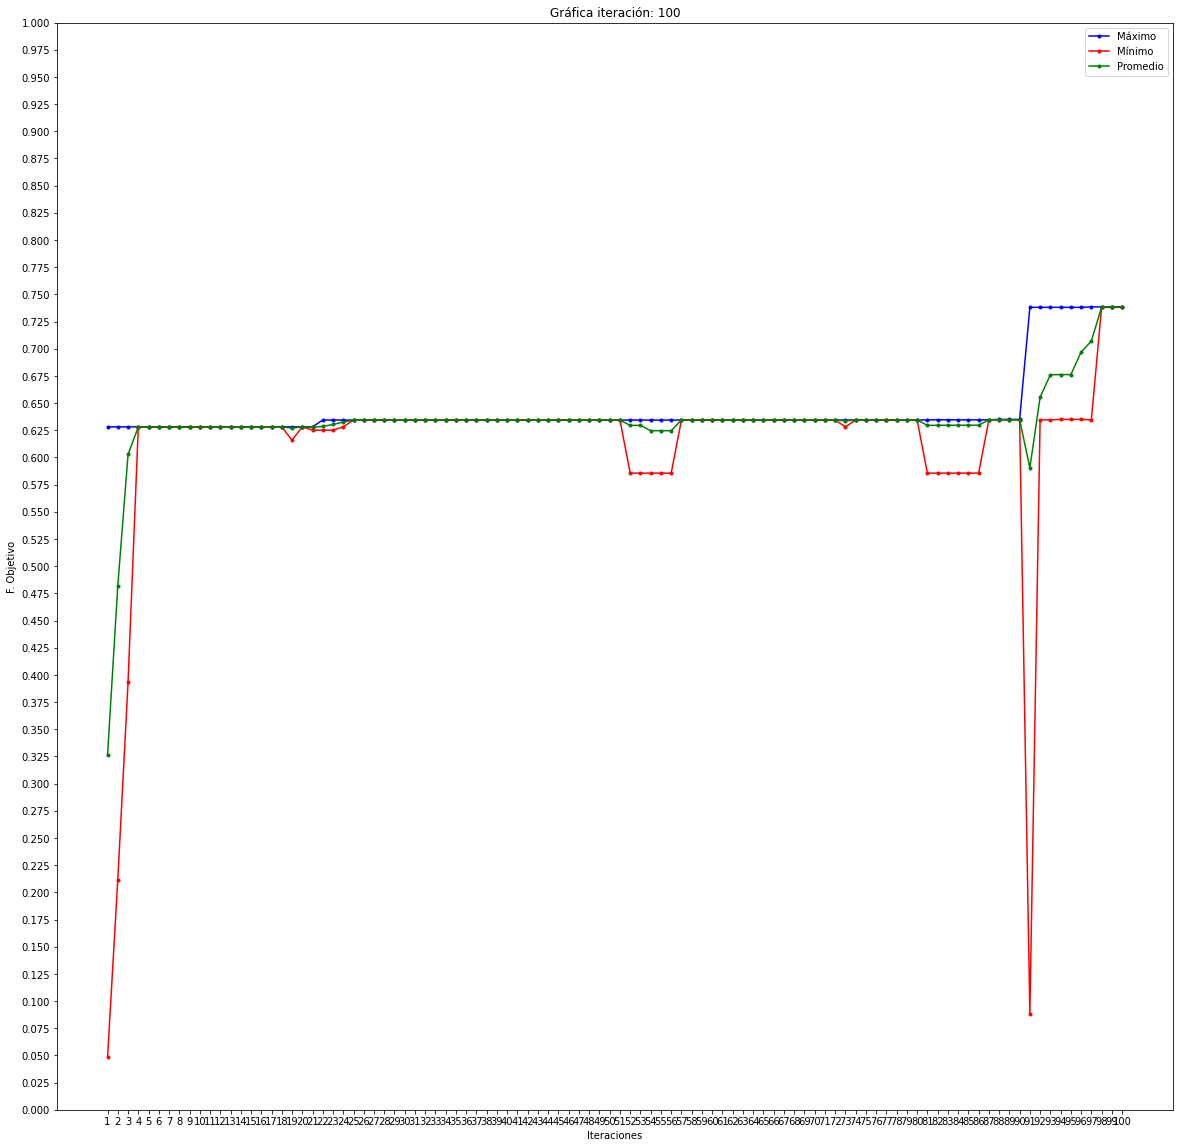

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.689821,0.968982,0.968994,0.968874
Fitness,1.000000,0.100000,0.100001,0.099989


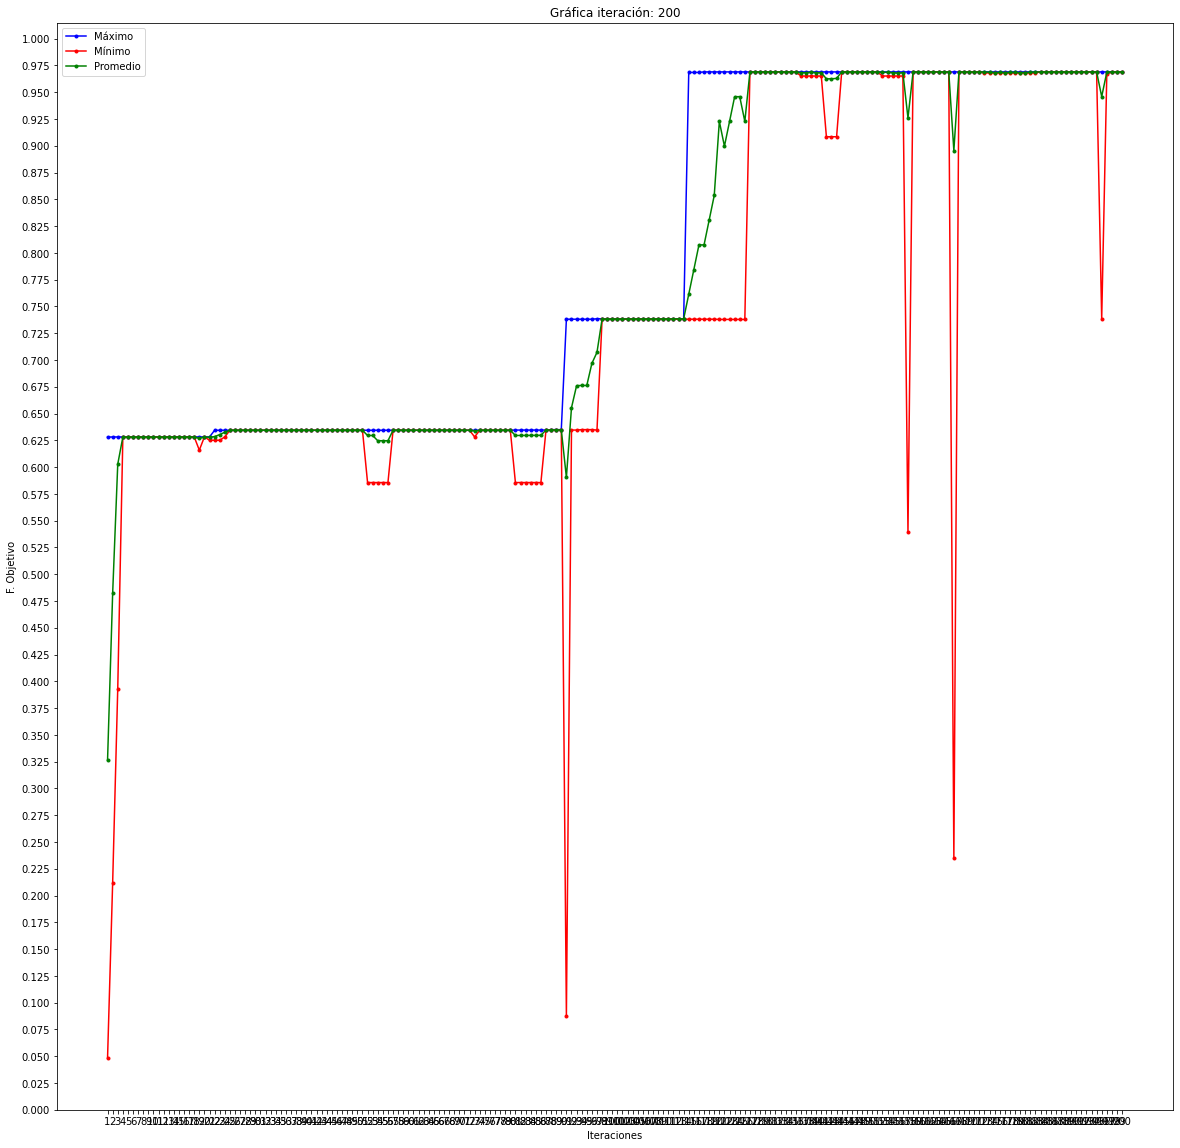

CASO C: Método selección torneo con elitismo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,8.411514,0.841151,0.841151,0.841151
Fitness,1.000000,0.100000,0.100000,0.100000


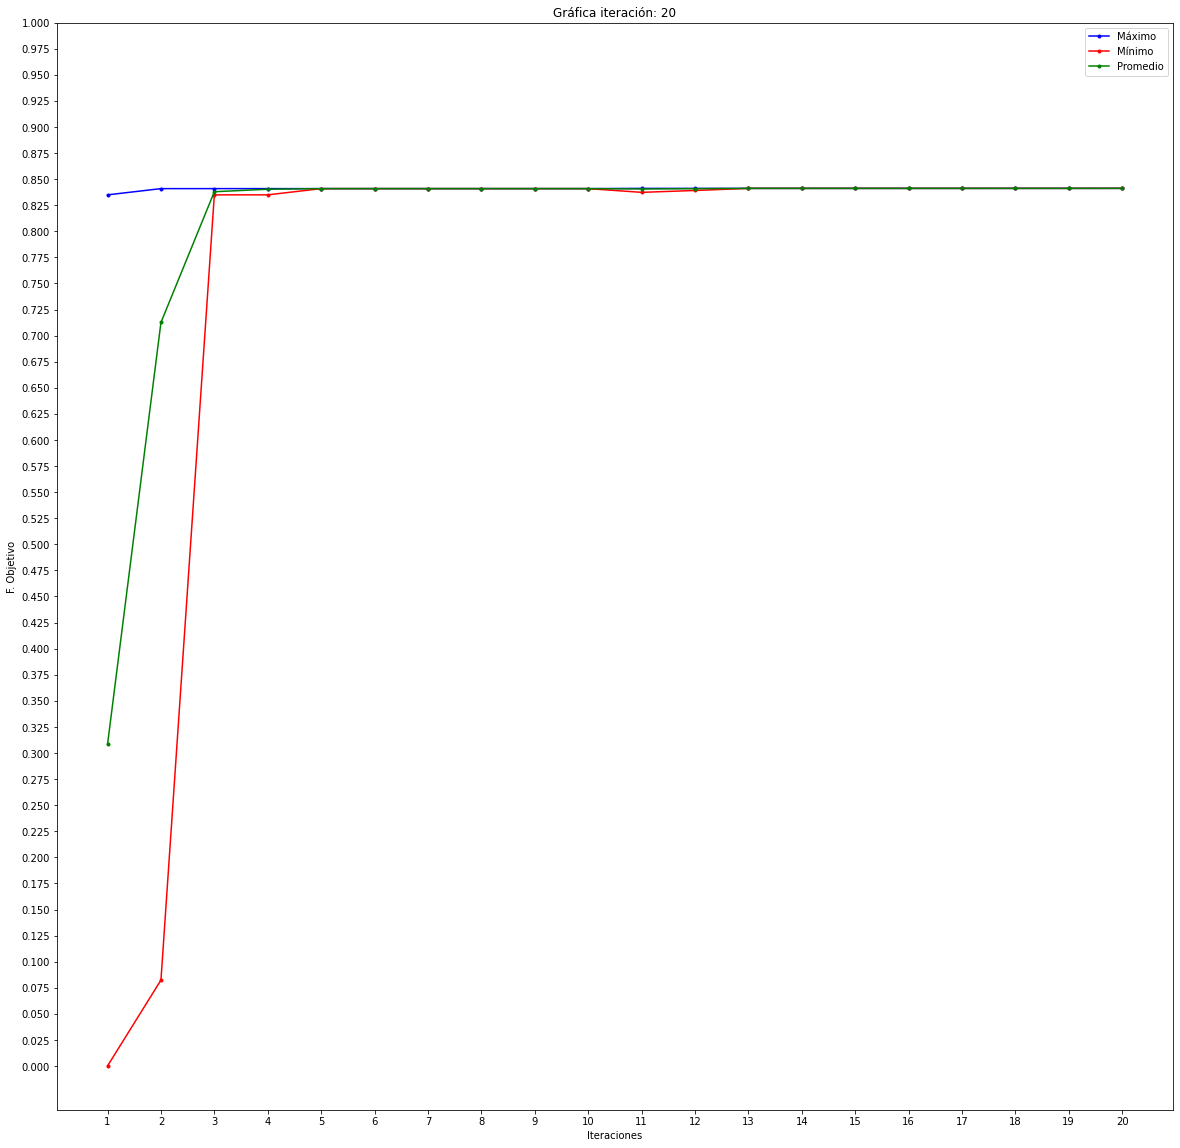

,Suma,Promedio,Máximo,Mínimo
Función objetivo,8.424641,0.842464,0.842554,0.841658
Fitness,1.000000,0.100000,0.100011,0.099904


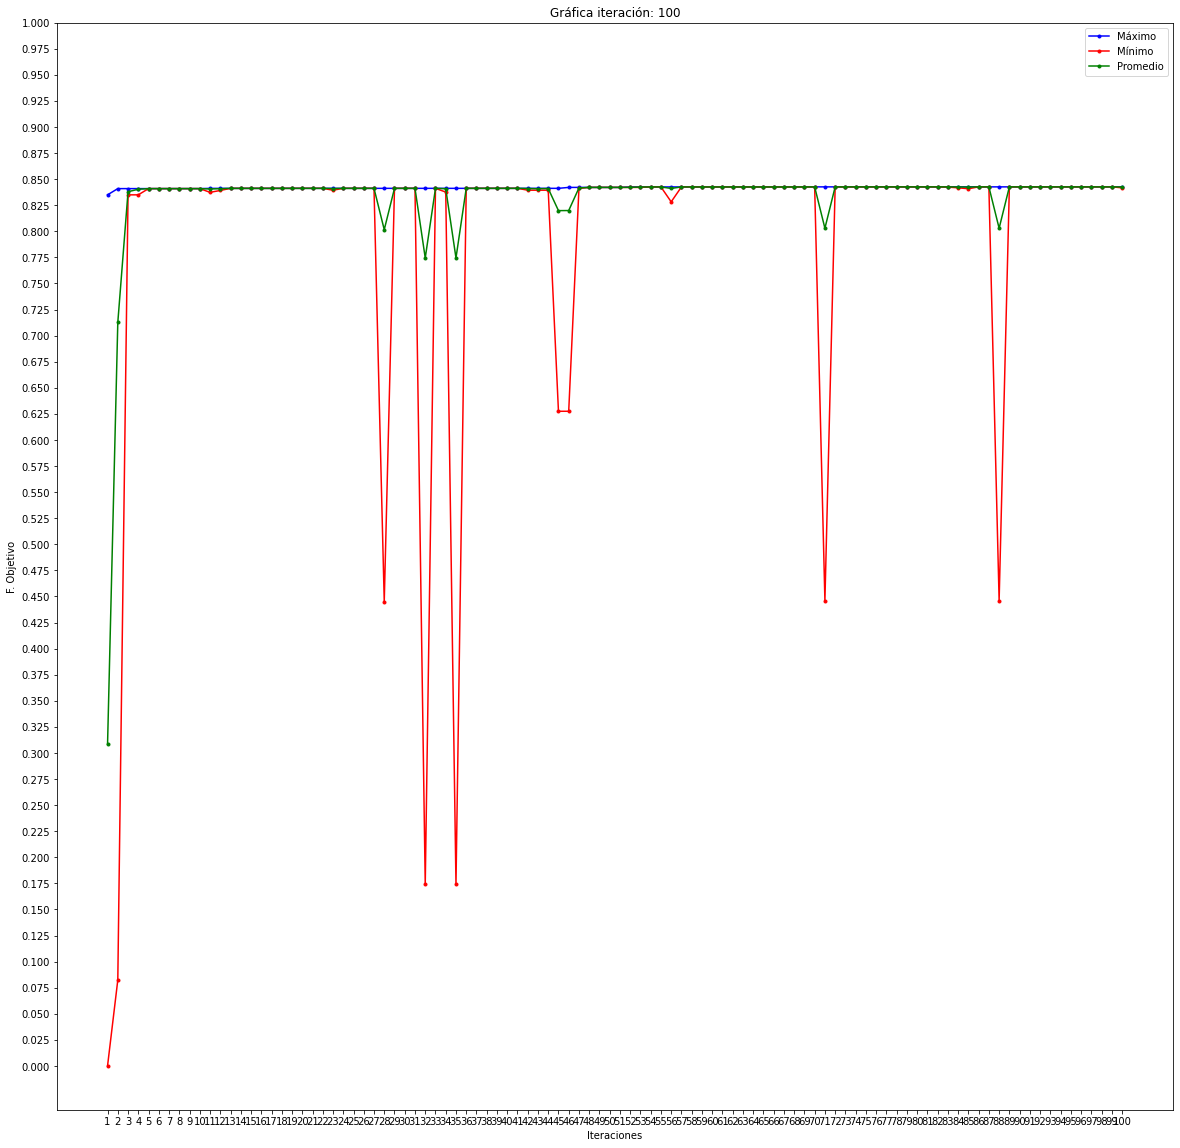

,Suma,Promedio,Máximo,Mínimo
Función objetivo,10.000000,1.000000,1.000000,1.000000
Fitness,1.000000,0.100000,0.100000,0.100000


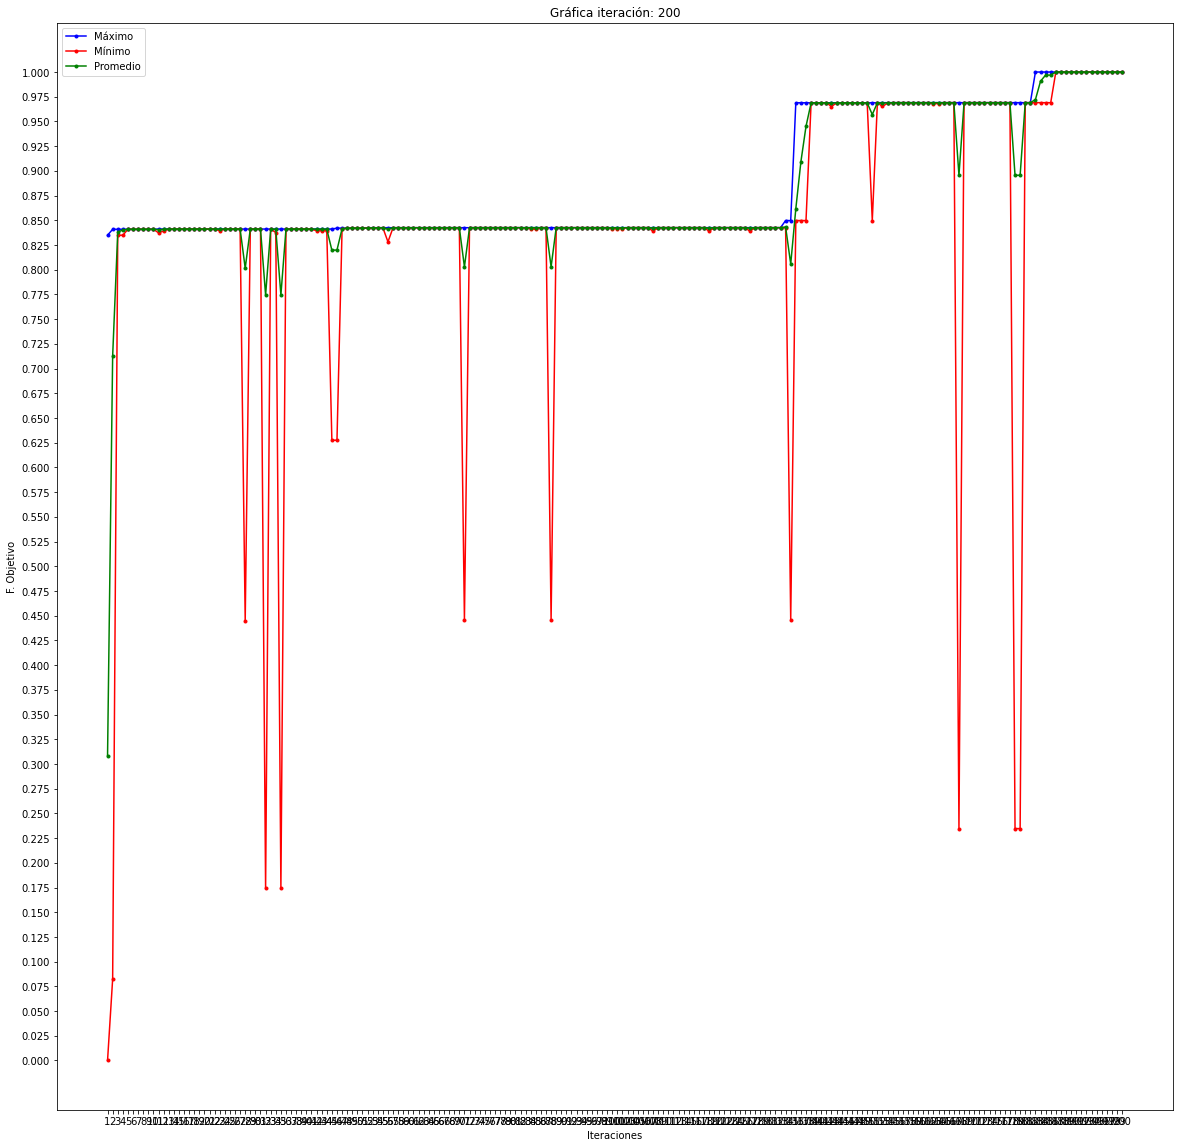

In [179]:
def main(seleccion, tieneElitismo = False, mutar = True):
    estadisticas = { "Máximo":[], "Mínimo":[], "Promedio":[]}
    poblacion_decimal = poblacionInicial()
    poblacion_binarios = convertirPoblacion(poblacion_decimal)
    for i in range(0, CICLOS):
        marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
        marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
        estadisticas["Máximo"].append(stats['Máximo'][0])
        estadisticas["Mínimo"].append(stats['Mínimo'][0])
        estadisticas["Promedio"].append(stats['Promedio'][0])
        if tieneElitismo:
            elite = elitismo(marcoDeDatos, 2)
            cromosomasPadresNoElite = seleccion(marcoDeDatos, 8)
            cromosomasHijos = crossover(cromosomasPadresNoElite, 8)
            if mutar: cromosomasHijos = mutacion(cromosomasHijos, 8)
            poblacion_binarios = elite + cromosomasHijos
        else:
            cromosomasPadres = seleccion(marcoDeDatos, 10)
            cromosomasHijos = crossover(cromosomasPadres, 10)
            if mutar: cromosomasHijosMutados = mutacion(cromosomasHijos, 10)
            poblacion_binarios = cromosomasHijosMutados
        poblacion_decimal = convertirPoblacion(poblacion_binarios, False)
        if ( (i==(ITERACIONES_IMPRIMIBLES[0] - 1)) or (i==(ITERACIONES_IMPRIMIBLES[1] - 1)) or (i == (ITERACIONES_IMPRIMIBLES[2] - 1)) ): # 20, 100, 200. le resto 1 xq empieza en 0.
            marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
            marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
            
            display(marcoDeDatos_stats.style.set_table_attributes("style='display:inline'").set_caption('Tabla iteración: ' + str(i+1)))
            hacerGrafico(estadisticas, i+1)

# opciones extra hacer mismo grafico sin mutación. (Se ve como se estanca la función en maximos locales)
print("CASO A: Método selección ruleta")
main(ruleta)
print("CASO B: Método selección torneo")
main(torneo)
print("CASO C: Método selección Ruleta con elitismo")
main(ruleta, tieneElitismo = True)
print("CASO C: Método selección torneo con elitismo")
main(torneo, tieneElitismo = True)